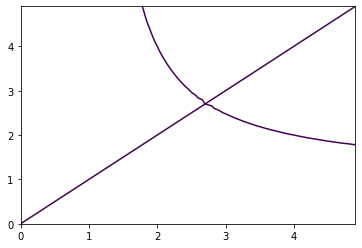

f: 5.0000  f`: -669.8204  f``: -125.2198
f: 7.5000  f`: -1756.0142  f``: -109.9696
f: 8.7500  f`: -2699.1519  f``: -65.3475
f: 9.3750  f`: -3300.3891  f``: -35.1237
f: 9.6875  f`: -3637.0156  f``: -18.1601
f: 9.8438  f`: -3814.7749  f``: -9.2280
f: 9.9219  f`: -3906.0714  f``: -4.6508
f: 9.9609  f`: -3952.3307  f``: -2.3346
f: 9.9805  f`: -3975.6140  f``: -1.1696
f: 9.9902  f`: -3987.2941  f``: -0.5854
f: 9.9951  f`: -3993.1438  f``: -0.2928
f: 9.9976  f`: -3996.0711  f``: -0.1464
f: 9.9988  f`: -3997.5354  f``: -0.0732
f: 9.9994  f`: -3998.2676  f``: -0.0366
f: 9.9997  f`: -3998.6338  f``: -0.0183
f: 9.9998  f`: -3998.8169  f``: -0.0092


In [3]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return x - y - 4*x*y**2 * np.sqrt(x**2 + y**2)


def df(x, y):
    return (np.sqrt(x**2 + y**2) - 8*y**2*x**2 - 4*y**4) / np.sqrt(x**2 + y**2)


def ddf(x, y):
    return -((8*y**2*x**3 + 12*y**4*x) / (x**2 + y**2)**1.5)


def bisection(a, b, y0=0, e=1e-4):
    y = y0
    xs = []
    ys = []
    if np.sign(f(a, y)) == np.sign(f(b, y)):
        raise ValueError('f(a) and f(b) must have different signs')
    f_a = f(a, y)
    for i in range(1, 1000):
        y += abs(b-a)
        x = a + (b - a)/2
        f_x = f(x, y)
        xs.append(x)
        ys.append(y)
        if np.sign(f_a) == np.sign(f_x):
            a = x
        else:
            b = x
        if abs(b-a) > e:
            continue
        else:
            x = a + (b-a)/2
            return x, xs, ys


bis, xs, ys = bisection(0, 5)

x = np.arange(0, 5, 0.1)
X, Y = np.meshgrid(x, x)
F = Y**X
G = X**Y
plt.contour(X, Y, (F - G), [0])
plt.show()

_df = [df(xs[i], ys[i]) for i in range(len(ys))]
_ddf = [ddf(xs[i], ys[i]) for i in range(len(ys))]

for i in range(len(ys)):
    print(f'f: {ys[i]:.4f}  f`: {_df[i]:.4f}  f``: {_ddf[i]:.4f}')